## Herramientas de visualización

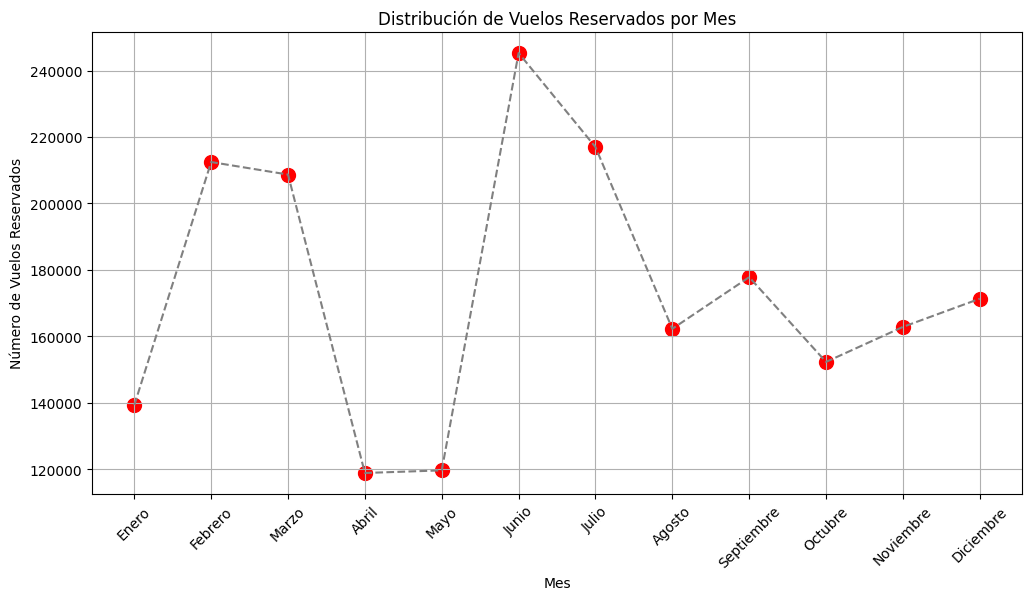

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Relación entre la cantidad total de vuelos reservados por mes

# Cargar el CSV limpio
df = pd.read_csv("Customer_Data.csv")

# Agrupar por mes y calcular la cantidad total de vuelos reservados
monthly_flights = df.groupby('Month')['Total Flights'].sum()

# Datos en español
monthly_flights.index = [
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
]

# Gráfico de puntos
plt.figure(figsize=(12, 6))
plt.scatter(monthly_flights.index, monthly_flights.values, color='r', s=100)
plt.plot(monthly_flights.index, monthly_flights.values, linestyle='--', color='gray')
plt.title('Distribución de Vuelos Reservados por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Vuelos Reservados')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


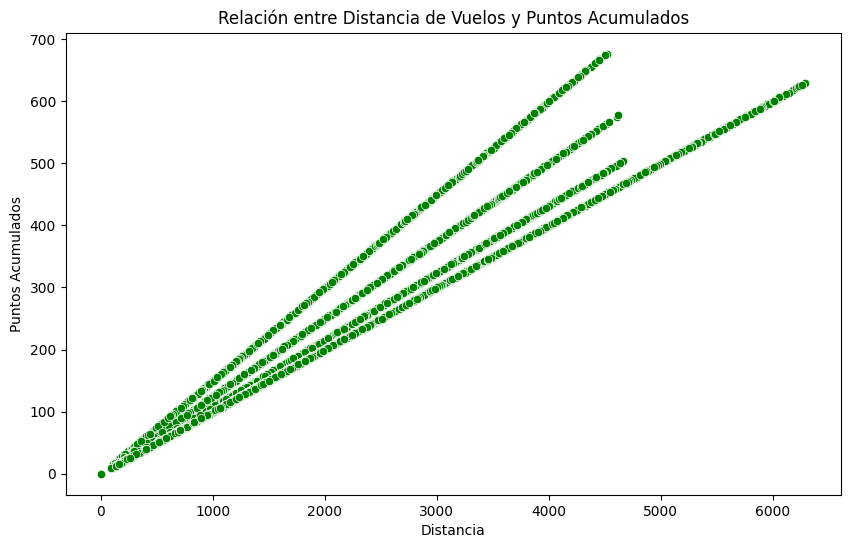

In [6]:

# 2. Relación entre la Distancia de los Vuelos y los Puntos Acumulados

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Distance', y='Points Accumulated', color='green')
plt.title('Relación entre Distancia de Vuelos y Puntos Acumulados')
plt.xlabel('Distancia')
plt.ylabel('Puntos Acumulados')
plt.show()


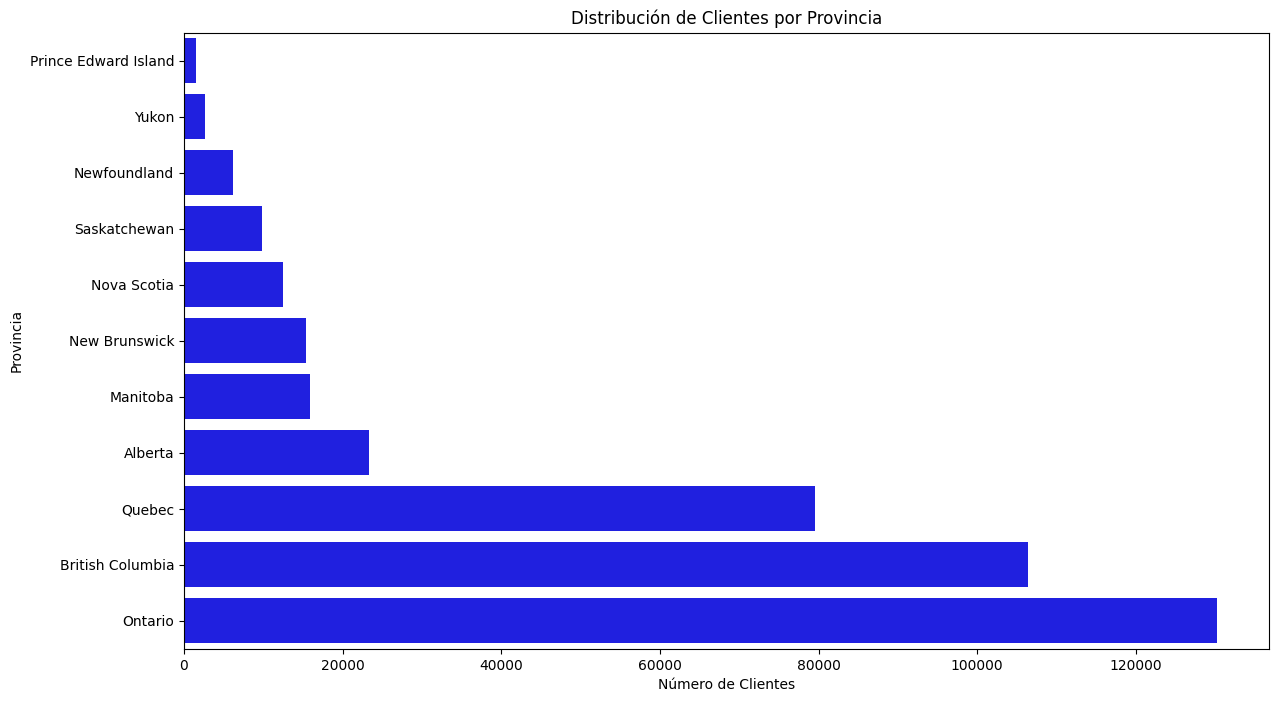

In [7]:

# 3. Distribución de Clientes por Provincia o Estado

# Ordenar las provincias por número de clientes de menor a mayor
province_order = df['Province'].value_counts(ascending=True).index

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='Province', order=province_order, color='blue')
plt.title('Distribución de Clientes por Provincia')
plt.xlabel('Número de Clientes')
plt.ylabel('Provincia')
plt.show()


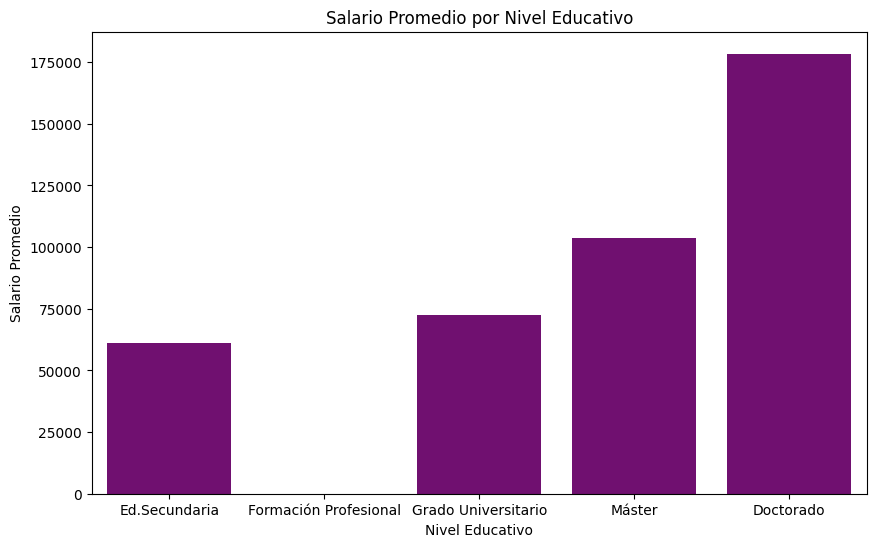

In [15]:
# 4. Salario Promedio por Nivel Educativo

# Renombrar los niveles educativos en el DataFrame
df['Education'] = df['Education'].replace({
    'High School or Below': 'Ed.Secundaria',
    'College': 'Formación Profesional',
    'Bachelor': 'Grado Universitario',
    'Master': 'Máster',
    'Doctor': 'Doctorado'
})

# Crear el gráfico con los nombres en español
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Education', y='Salary', errorbar=None, estimator=pd.Series.mean, order=[
    'Ed.Secundaria', 'Formación Profesional', 'Grado Universitario', 'Máster', 'Doctorado'
], color='purple')
plt.title('Salario Promedio por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.show()


In [12]:

# Agrupar por nivel educativo y calcular estadísticas descriptivas
education_stats = df.groupby('Education')['Salary'].agg(['mean', 'median', 'count', 'std'])

# Mostrar la tabla de estadísticas
print(education_stats)



                                mean    median   count           std
Education                                                           
Doctorado              178403.675202  180440.0   17731  70380.054033
Ed.Secundaria           61019.926143   61806.0   18915  12727.470522
Formación Profesional            NaN       NaN       0           NaN
Grado Universitario     72473.471154   71972.0  252567  17205.638882
Máster                 103734.523724  105487.0   12287  17518.492270


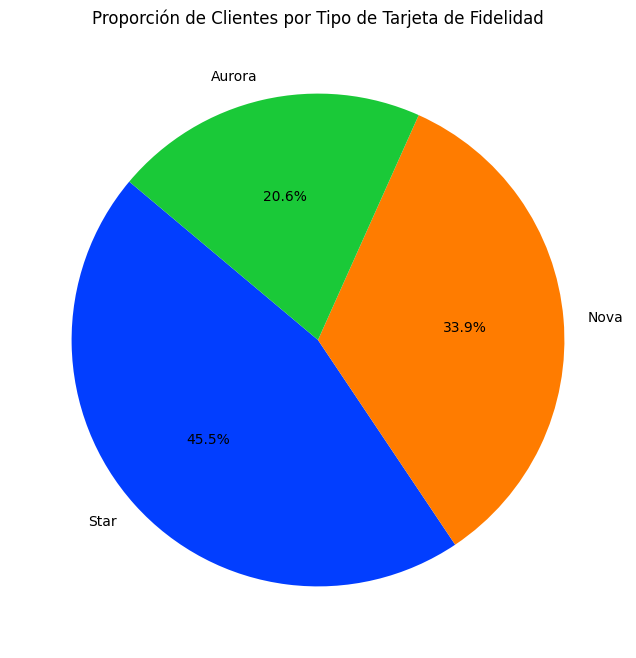

In [14]:

# 5. Proporción de Clientes con Diferentes Tipos de Tarjetas de Fidelidad

plt.figure(figsize=(8, 8))
df['Loyalty Card'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("bright"))
plt.title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad')
plt.ylabel('')
plt.show()


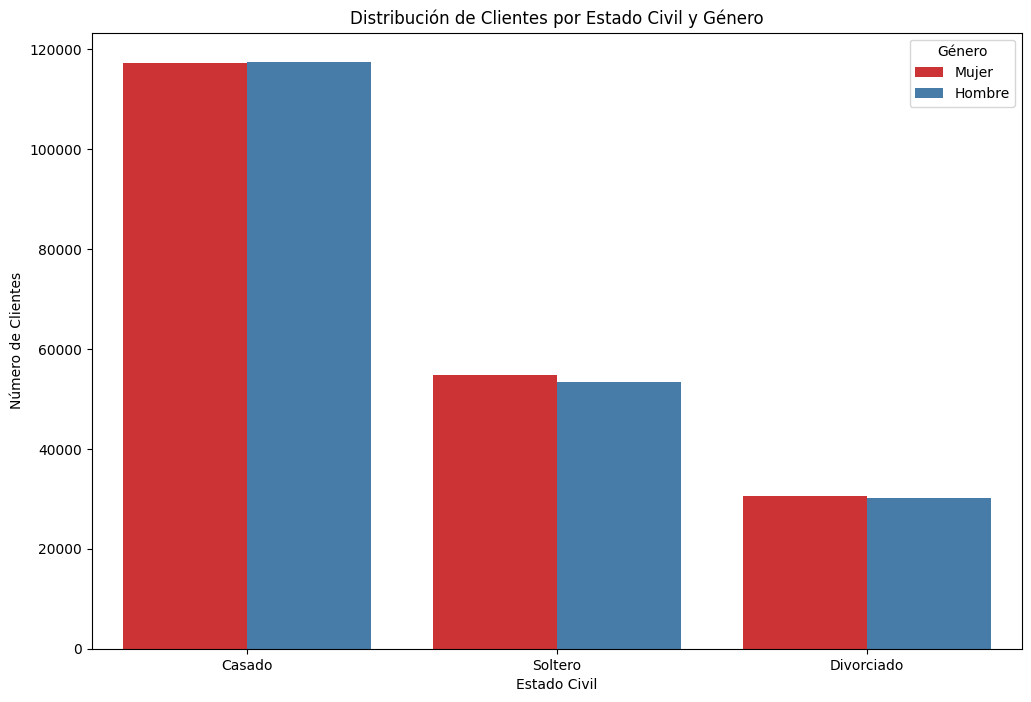

In [21]:

# 6. Distribución de Clientes Según Estado Civil y Género

# Renombrar la columna y los niveles del género en el DataFrame
df.rename(columns={'Gender': 'Género'}, inplace=True)
df['Género'] = df['Género'].replace({
    'Female': 'Mujer',
    'Male': 'Hombre'
})
df['Marital Status'] = df['Marital Status'].replace({
    'Married': 'Casado',
    'Single': 'Soltero',
    'Divorced': 'Divorciado'
})

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear un gráfico de conteo
sns.countplot(data=df, x='Marital Status', hue='Género', palette='Set1')

# Añadir títulos y etiquetas
plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')

# Mostrar el gráfico
plt.show()

